In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("50_Startups.csv")

In [3]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [4]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
independent = dataset[['R&D Spend','Administration','Marketing Spend','State_Florida', 'State_New York']]

In [6]:
dependent = dataset[['Profit']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,train_size=0.70,random_state=0)

In [9]:
#Model creation for SVM_(Support Vector Machine)_Regression_with_GSCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = {'kernel' :['rbf','poly','sigmoid','linear'],'C':[10,100,1000,2000,3000],'gamma':['auto','scale']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3,n_jobs=-1)

#fitting the model for gridsearchcv

grid.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: 

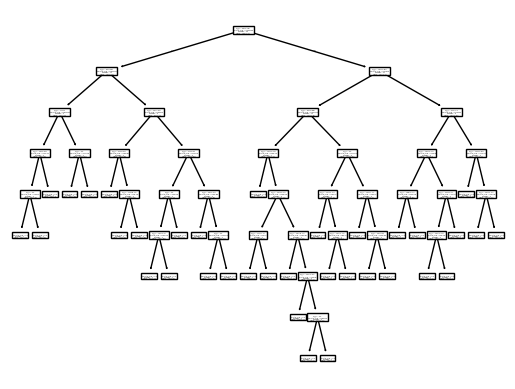

In [183]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [184]:
ypred = regressor.predict(x_test)

In [185]:
ypred

array([101004.64, 141585.52, 141585.52,  90708.19, 182901.99, 111313.02,
        71498.49,  97427.84, 108733.99, 156991.12,  99937.59,  89949.14,
       107404.34,  89949.14, 141585.52])

In [186]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,ypred)

In [187]:
r_score

0.9386203666533744

In [188]:
import pickle

In [189]:
mymodel= ("decision_tree.sav")

In [190]:
pickle.dump(regressor,open(mymodel,'wb'))